In [1]:
pip install path

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Initial imports.
import pandas as pd
import numpy as np
import matplotlib

from path import Path
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, export_text
from matplotlib import pyplot as plt
import seaborn as sns

import pydotplus
import io
from scipy import misc #access to img read method

%matplotlib inline 
#cell magic

## importing Dataset
- Import data
- EDA to visualize data and structure
- Train a classifier (DT)
- predict target using the trained classifier

In [4]:
data = pd.read_csv('Resources/track_analytics_full.csv')

In [5]:
data.describe()

,danceability,energy,key,loudness,rank,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.696627,0.645409,5.383663,-6.114266,0.573432,0.123672,0.230912,0.006635,0.172708,0.511855,121.722182,203088.907591,3.975248
std,0.138945,0.153687,3.650797,2.291785,0.494782,0.110630,0.231870,0.046332,0.134128,0.222714,29.864847,46245.684556,0.252579
min,0.238000,0.111000,0.000000,-18.435000,0.000000,0.023200,0.000025,0.000000,0.021500,0.037000,62.948000,30583.000000,1.000000
25%,0.611000,0.541000,2.000000,-7.226250,0.000000,0.046575,0.047575,0.000000,0.093600,0.339000,96.470250,174396.250000,4.000000
50%,0.714000,0.664000,6.000000,-5.754500,1.000000,0.077000,0.152000,0.000000,0.119000,0.513500,119.942000,199604.000000,4.000000
75%,0.799250,0.762000,8.000000,-4.611250,1.000000,0.162500,0.336000,0.000026,0.195000,0.681250,141.228750,226119.250000,4.000000
max,0.970000,0.972000,11.000000,-0.515000,1.000000,0.856000,0.991000,0.657000,0.920000,0.972000,203.927000,588139.000000,5.000000


In [6]:
train, test = train_test_split(data, test_size = 0.15)

In [7]:
print("Tarining size: {}; Test size: {}".format(len(train), len(test)))

Tarining size: 1030; Test size: 182


In [8]:
#shows your rows and column
train.shape

(1030, 18)

In [9]:
#color palette
red_blue =["#195B5E", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)

In [10]:
#positive and negative variable for song's attirbutes
pos_danceability = data[data['rank'] == 1]['danceability']
neg_danceability = data[data['rank'] == 0]['danceability']
pos_energy = data[data['rank'] == 1]['energy']
neg_energy = data[data['rank'] == 0]['energy']
pos_loudness = data[data['rank'] == 1]['loudness']
neg_loudness = data[data['rank'] == 0]['loudness']
pos_tempo = data[data['rank'] == 1]['tempo']
neg_tempo = data[data['rank'] == 0]['tempo']
pos_key = data[data['rank'] == 1]['key']
neg_key = data[data['rank'] == 0]['key']
pos_acousticness = data[data['rank'] == 1]['acousticness']
neg_acousticness = data[data['rank'] == 0]['acousticness']
pos_instrumentalness = data[data['rank'] == 1]['instrumentalness']
neg_instrumentalness = data[data['rank'] == 0]['instrumentalness']
pos_valence = data[data['rank'] == 1]['valence']
neg_valence = data[data['rank'] == 0]['valence']
pos_duration_ms = data[data['rank'] == 1]['duration_ms']
neg_duration_ms = data[data['rank'] == 0]['duration_ms']

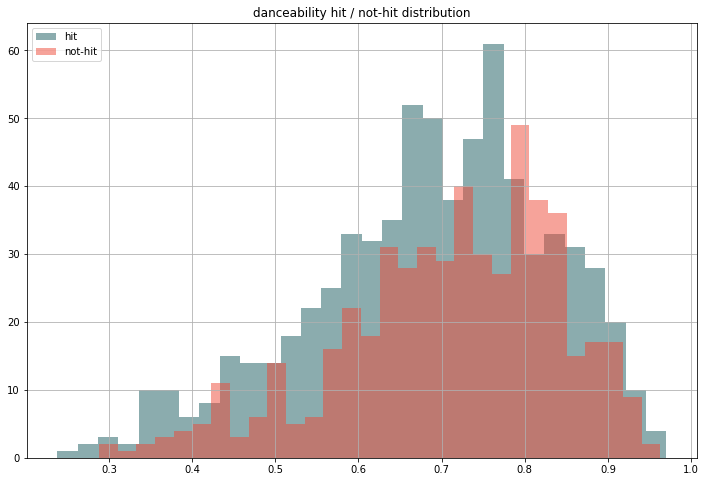

In [11]:
fig = plt.figure(figsize = (12,8))
plt.title("danceability hit / not-hit distribution")
pos_danceability.hist(alpha = 0.5, bins = 30, label='hit')
neg_danceability.hist(alpha = 0.5, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/danceability', dpi=100)

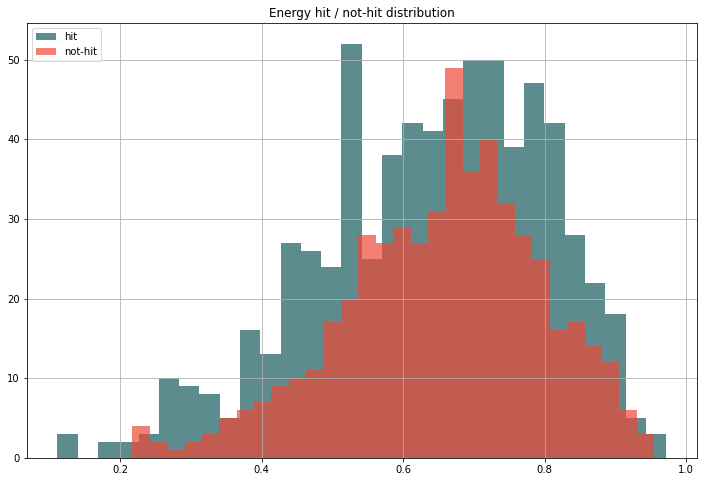

In [12]:
#energy

fig = plt.figure(figsize = (12,8))
plt.title("Energy hit / not-hit distribution")
pos_energy.hist(alpha = 0.7, bins = 30, label='hit')
neg_energy.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/energy', dpi=100)

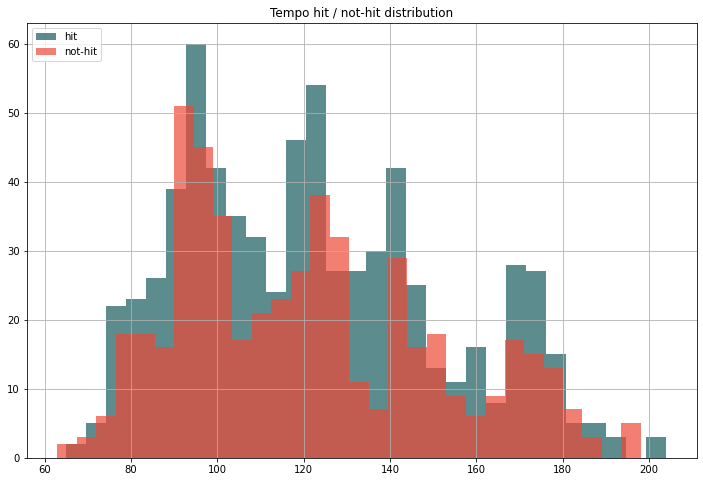

In [13]:
#tempo
fig = plt.figure(figsize = (12,8))
plt.title("Tempo hit / not-hit distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label='hit')
neg_tempo.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/tempo', dpi=100)

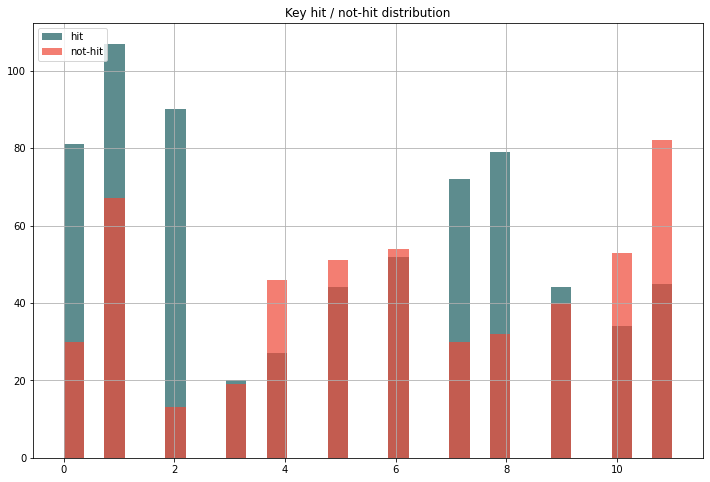

In [14]:
#key
fig = plt.figure(figsize = (12,8))
plt.title("Key hit / not-hit distribution")
pos_key.hist(alpha = 0.7, bins = 30, label='hit')
neg_key.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/key', dpi=100)

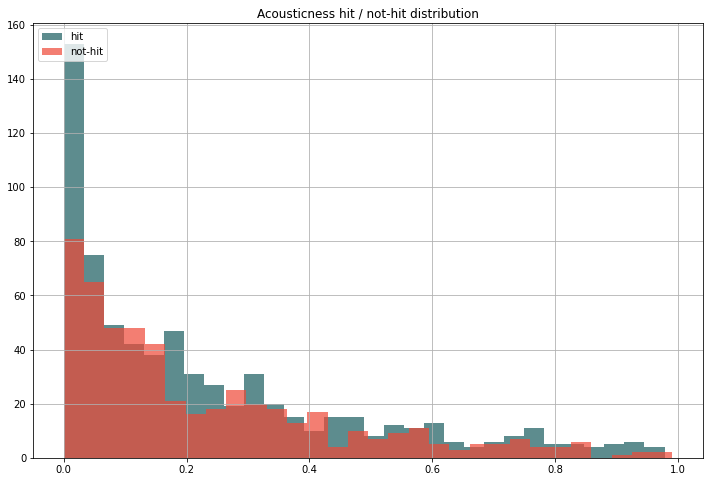

In [15]:
#acousticness
fig = plt.figure(figsize = (12,8))
plt.title("Acousticness hit / not-hit distribution")
pos_acousticness.hist(alpha = 0.7, bins = 30, label='hit')
neg_acousticness.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/acousticness', dpi=100)

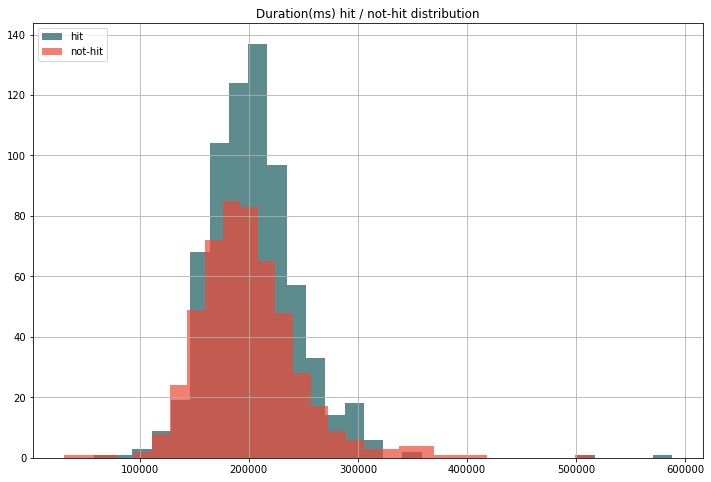

In [16]:
#duration_ms
fig = plt.figure(figsize = (12,8))
plt.title("Duration(ms) hit / not-hit distribution")
pos_duration_ms.hist(alpha = 0.7, bins = 30, label='hit')
neg_duration_ms.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/duration', dpi=100)

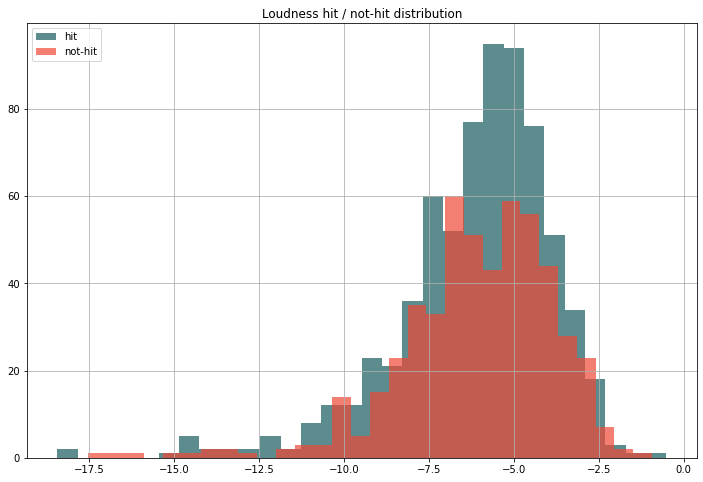

In [17]:
#loudness
fig = plt.figure(figsize = (12,8))
plt.title("Loudness hit / not-hit distribution")
pos_loudness.hist(alpha = 0.7, bins = 30, label='hit')
neg_loudness.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/loudness', dpi=100)

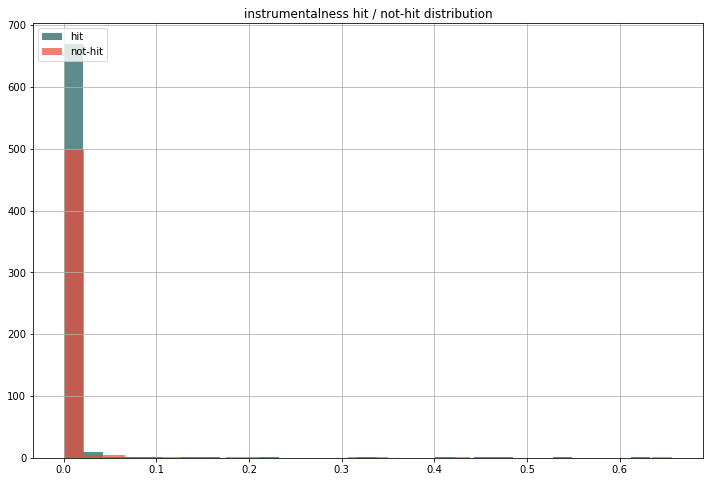

In [18]:
#instrumentalness
fig = plt.figure(figsize = (12,8))
plt.title("instrumentalness hit / not-hit distribution")
pos_instrumentalness.hist(alpha = 0.7, bins = 30, label='hit')
neg_instrumentalness.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/instrument', dpi=100)

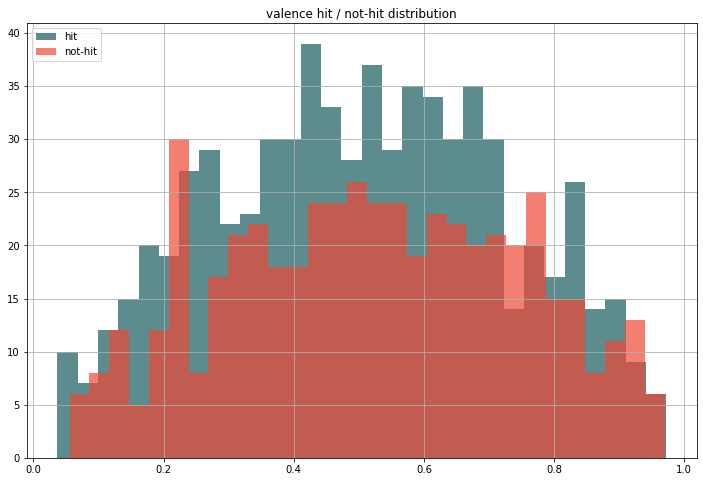

In [19]:
#valence
fig = plt.figure(figsize = (12,8))
plt.title("valence hit / not-hit distribution")
pos_valence.hist(alpha = 0.7, bins = 30, label='hit')
neg_valence.hist(alpha = 0.7, bins = 30, label='not-hit')
plt.legend(loc = "upper left")
plt.savefig('Resources/valence', dpi=100)

In [20]:
#min samples need to split the tree is 50 | less split = more dense the tree
c = DecisionTreeClassifier(min_samples_split=100)

In [21]:
# features we want DT to consider as it is begining to be built & store it as a list
attributes = ["danceability","energy","tempo","key","acousticness","loudness","instrumentalness","valence","duration_ms"]

In [22]:
#define training & test set
X_train = train[attributes]
y_train = train["rank"]

X_test = test[attributes]
y_test = test["rank"]

In [23]:
dt = c.fit(X_train,y_train)

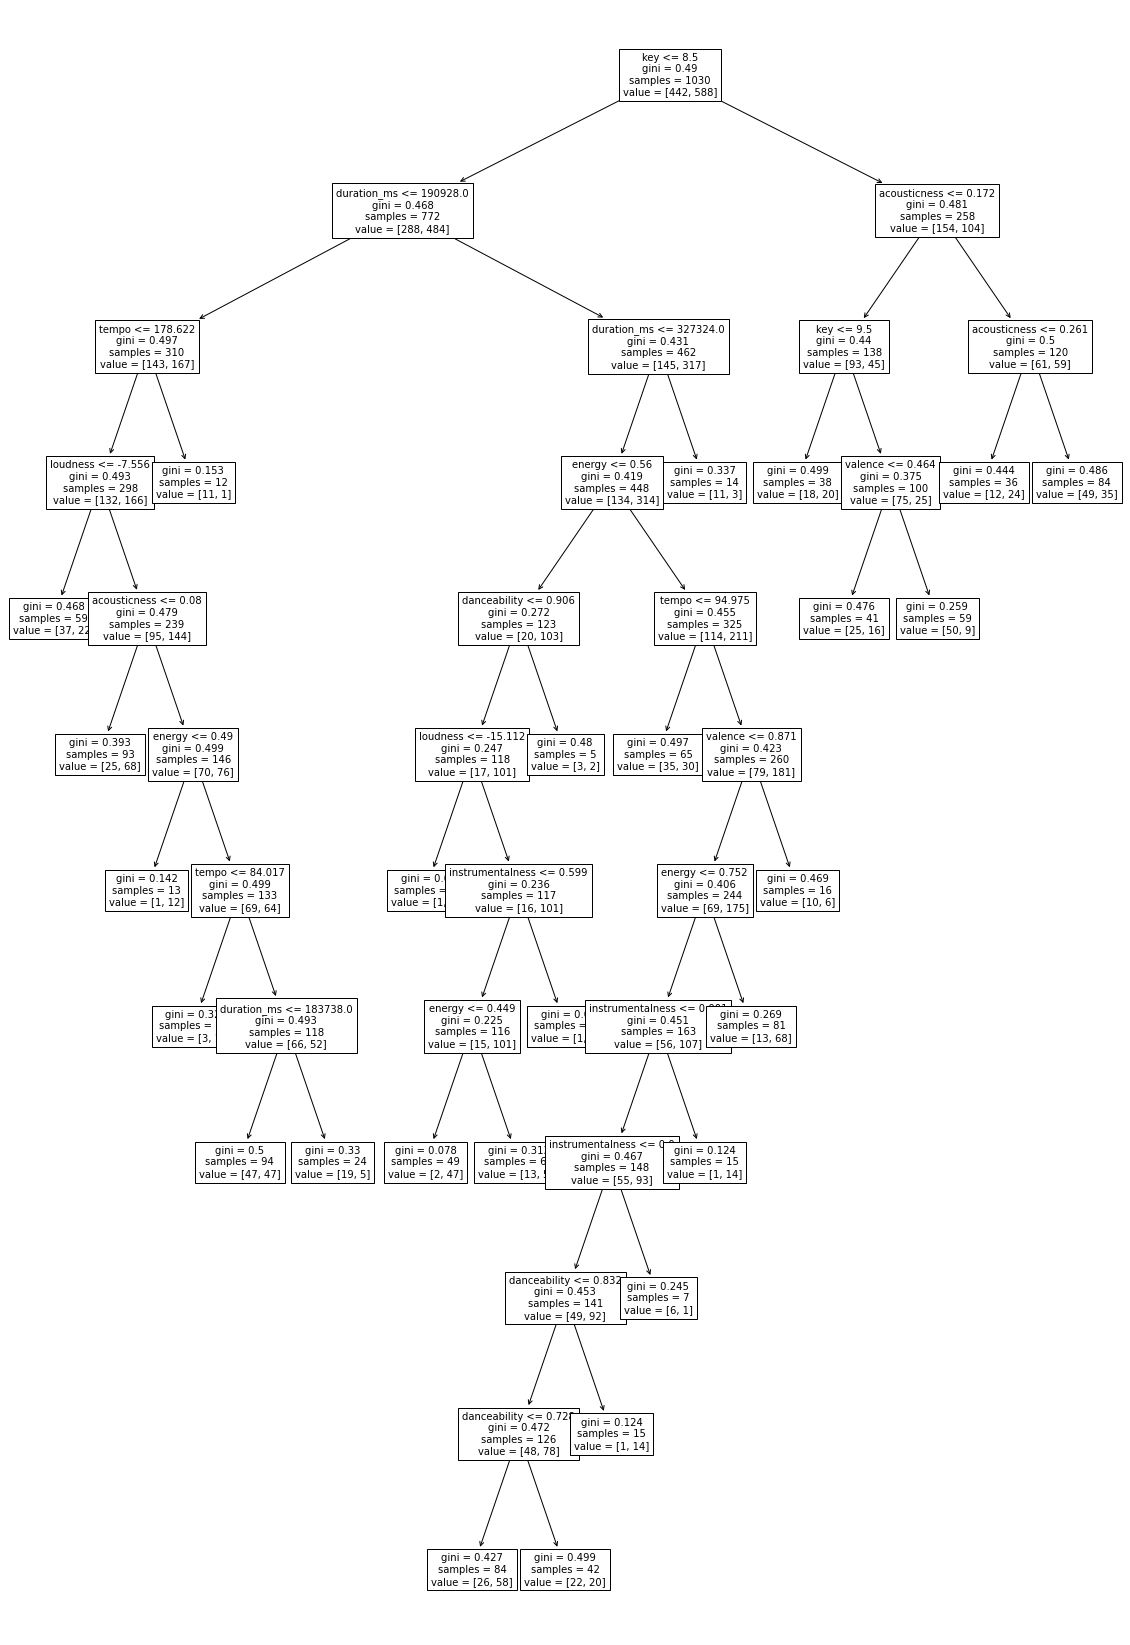

In [24]:
#decision tree image
plt.figure(figsize=(20,30))
tree.plot_tree(dt, feature_names = attributes, fontsize = 10)
plt.savefig('Resources/tree_high_dpi', dpi=100)

In [25]:
predictions = c.predict(X_test)

In [26]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0], dtype=int64)

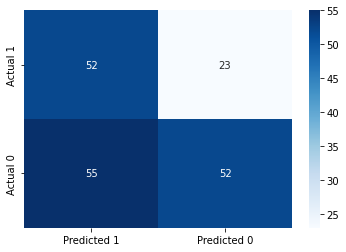

,Predicted 1,Predicted 0
Actual 1,52,23
Actual 0,55,52


In [27]:
#testing accuracy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
sns.heatmap(cm_df,cmap="Blues", annot=True,
           )
plt.show()

cm_df


# Out of the songs that are not in Top 20s, 
# 52 are predicted to be hits (True positive)
# 23 are predicted to fall, although they meet the requirement (Fasle Negative)
# 55 are predicted to be hits with out meeting the requirements (False Positive)
# 52 are destined to be out of Top 20s (True Negative)

In [28]:
cm_df.to_csv("Resources/prediction.csv")

In [29]:
score = accuracy_score(y_test, predictions) * 100

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 0
Actual 1,52,23
Actual 0,55,52


Accuracy Score : 57.14285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.69      0.57        75
           1       0.69      0.49      0.57       107

    accuracy                           0.57       182
   macro avg       0.59      0.59      0.57       182
weighted avg       0.61      0.57      0.57       182



In [31]:
#Precision: Precision is the measure of how reliable a positive classification is. 
#Recall: Recall is the ability of the classifier to find all the positive samples. A low recall is indicative of a large number of false negatives.
#F1 score: F1 score is a weighted average of the true positive rate (recall) and precision, where the best score is 1.0 and the worst is 0.0.
#Support: Support is the number of actual occurrences of the class in the specified dataset. 

## RandomForest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Loading data
file_path = Path("Resources/track_analytics_full.csv")
df_tracks = pd.read_csv(file_path)
df_tracks.describe()

,danceability,energy,key,loudness,rank,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.696627,0.645409,5.383663,-6.114266,0.573432,0.123672,0.230912,0.006635,0.172708,0.511855,121.722182,203088.907591,3.975248
std,0.138945,0.153687,3.650797,2.291785,0.494782,0.110630,0.231870,0.046332,0.134128,0.222714,29.864847,46245.684556,0.252579
min,0.238000,0.111000,0.000000,-18.435000,0.000000,0.023200,0.000025,0.000000,0.021500,0.037000,62.948000,30583.000000,1.000000
25%,0.611000,0.541000,2.000000,-7.226250,0.000000,0.046575,0.047575,0.000000,0.093600,0.339000,96.470250,174396.250000,4.000000
50%,0.714000,0.664000,6.000000,-5.754500,1.000000,0.077000,0.152000,0.000000,0.119000,0.513500,119.942000,199604.000000,4.000000
75%,0.799250,0.762000,8.000000,-4.611250,1.000000,0.162500,0.336000,0.000026,0.195000,0.681250,141.228750,226119.250000,4.000000
max,0.970000,0.972000,11.000000,-0.515000,1.000000,0.856000,0.991000,0.657000,0.920000,0.972000,203.927000,588139.000000,5.000000


In [34]:
# Define the features set.
X = df_tracks.copy()
X = X.drop("rank",axis=1)
X.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.696627,0.645409,5.383663,-6.114266,0.123672,0.230912,0.006635,0.172708,0.511855,121.722182,203088.907591,3.975248
std,0.138945,0.153687,3.650797,2.291785,0.110630,0.231870,0.046332,0.134128,0.222714,29.864847,46245.684556,0.252579
min,0.238000,0.111000,0.000000,-18.435000,0.023200,0.000025,0.000000,0.021500,0.037000,62.948000,30583.000000,1.000000
25%,0.611000,0.541000,2.000000,-7.226250,0.046575,0.047575,0.000000,0.093600,0.339000,96.470250,174396.250000,4.000000
50%,0.714000,0.664000,6.000000,-5.754500,0.077000,0.152000,0.000000,0.119000,0.513500,119.942000,199604.000000,4.000000
75%,0.799250,0.762000,8.000000,-4.611250,0.162500,0.336000,0.000026,0.195000,0.681250,141.228750,226119.250000,4.000000
max,0.970000,0.972000,11.000000,-0.515000,0.856000,0.991000,0.657000,0.920000,0.972000,203.927000,588139.000000,5.000000


In [35]:
X = X.drop("type",axis=1)
X = X.drop("uri",axis=1)
X = X.drop("id",axis=1)
X = X.drop("track_href",axis=1)
X= X.drop("analysis_url", axis=1)

In [36]:
# Define the target set.
y = df_tracks["rank"].ravel()
y[:9]

array([1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [37]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78,train_size=0.80)
X[:10]

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.735,0.482,8,-9.445,0.1390,0.00623,0.014400,0.4480,0.315,181.995,217933,4
1,0.835,0.626,1,-5.833,0.1250,0.05890,0.000060,0.3960,0.350,91.030,217925,4
2,0.759,0.540,9,-6.039,0.0287,0.03700,0.000000,0.0945,0.750,116.947,190960,4
3,0.909,0.405,6,-8.133,0.1400,0.03060,0.006980,0.1050,0.455,154.984,238613,4
4,0.759,0.548,9,-6.049,0.0290,0.03920,0.000000,0.0828,0.749,116.967,190800,4
5,0.746,0.690,11,-7.956,0.1640,0.24700,0.000000,0.1010,0.497,89.977,181733,4
6,0.613,0.581,0,-8.588,0.0424,0.53700,0.000345,0.2500,0.551,130.033,239560,4
7,0.563,0.664,9,-5.044,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
8,0.714,0.800,11,-4.808,0.0504,0.12700,0.000000,0.3590,0.589,134.002,211560,4
9,0.629,0.547,10,-13.123,0.0550,0.72000,0.003140,0.0604,0.197,108.375,298933,4


In [38]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

In [39]:
# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=50, random_state=78) 

In [41]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [42]:
# Making predictions using the testing data.
prediction = rf_model.predict(X_test_scaled)

In [43]:
prediction

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

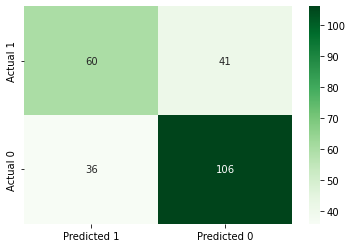

,Predicted 1,Predicted 0
Actual 1,60,41
Actual 0,36,106


In [44]:
# Calculating the confusion matrix.
cm2 = confusion_matrix(y_test, prediction)

# Create a DataFrame from the confusion matrix.
cm2_df = pd.DataFrame(
    cm2, index=["Actual 1", "Actual 0"], columns=["Predicted 1", "Predicted 0"])
sns.heatmap(cm2_df,cmap="Greens", annot=True,fmt=".0f"
           )
#formatting the numbers in seaborn
plt.show()

cm2_df

In [45]:
# Out of the songs that are not in Top 20s, 
# 60 are predicted to be hits (True positive)
# 41 are predicted to fall, although they meet the requirement (Fasle Negative)
# 36 are predicted to be hits with out meeting the requirements (False Positive)
# 106 are destined to be out of Top 20s (True Negative)

#Acc score is at 68%

In [46]:
cm2_df.to_csv("Resources/RF_prediction.csv")

In [47]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, prediction) * 100

In [48]:
# Displaying results
print("RF_Confusion Matrix")
display(cm2_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction))

RF_Confusion Matrix


,Predicted 1,Predicted 0
Actual 1,60,41
Actual 0,36,106


Accuracy Score : 68.3127572016461
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       101
           1       0.72      0.75      0.73       142

    accuracy                           0.68       243
   macro avg       0.67      0.67      0.67       243
weighted avg       0.68      0.68      0.68       243



## BootStrapping

In [49]:
# Loading data
file_path = Path("Resources/track_analytics_full.csv")
df_track = pd.read_csv(file_path)
df_track.describe()

,danceability,energy,key,loudness,rank,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.696627,0.645409,5.383663,-6.114266,0.573432,0.123672,0.230912,0.006635,0.172708,0.511855,121.722182,203088.907591,3.975248
std,0.138945,0.153687,3.650797,2.291785,0.494782,0.110630,0.231870,0.046332,0.134128,0.222714,29.864847,46245.684556,0.252579
min,0.238000,0.111000,0.000000,-18.435000,0.000000,0.023200,0.000025,0.000000,0.021500,0.037000,62.948000,30583.000000,1.000000
25%,0.611000,0.541000,2.000000,-7.226250,0.000000,0.046575,0.047575,0.000000,0.093600,0.339000,96.470250,174396.250000,4.000000
50%,0.714000,0.664000,6.000000,-5.754500,1.000000,0.077000,0.152000,0.000000,0.119000,0.513500,119.942000,199604.000000,4.000000
75%,0.799250,0.762000,8.000000,-4.611250,1.000000,0.162500,0.336000,0.000026,0.195000,0.681250,141.228750,226119.250000,4.000000
max,0.970000,0.972000,11.000000,-0.515000,1.000000,0.856000,0.991000,0.657000,0.920000,0.972000,203.927000,588139.000000,5.000000


In [50]:
X = df_tracks.copy()
X = X.drop("rank", axis=1)
y = df_track["rank"].values

In [51]:
X = X.drop("type",axis=1)
X = X.drop("uri",axis=1)
X = X.drop("id",axis=1)
X = X.drop("track_href",axis=1)
X= X.drop("analysis_url", axis=1)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=78,train_size=0.80)

In [53]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
#a for loop is used to identify the learning rate that yields the best performance.

from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]
for learning_rate in learning_rates:
   classifier = GradientBoostingClassifier(n_estimators=100,
   learning_rate=1, max_features=5, max_depth=3, random_state=78)

classifier.fit(X_train_scaled, y_train)
prediction2 = classifier.predict(X_test_scaled)

In [55]:
print("Learning rate:", learning_rate)
print("Accuracy score (training): {0:.3f}".format(
       classifier.score(
           X_train_scaled,
           y_train)))
print("Accuracy score (validation): {0:.3f}".format(
       classifier.score(
           X_test_scaled,
           y_test)))

Learning rate: 1
Accuracy score (training): 1.000
Accuracy score (validation): 0.671


In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
acc_score2 = accuracy_score(y_test, prediction2)
print(f"Accuracy Score : {acc_score2}")

Accuracy Score : 0.6707818930041153


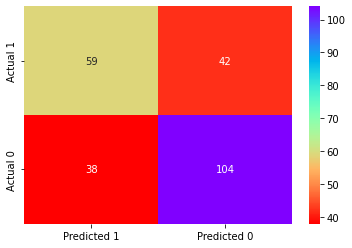

,Predicted 1,Predicted 0
Actual 1,59,42
Actual 0,38,104


In [57]:
cm3 = confusion_matrix(y_test, prediction2)
cm3_df = pd.DataFrame(
   cm3, index=["Actual 1", "Actual 0"],
   columns=["Predicted 1", "Predicted 0"]
)
sns.heatmap(cm3_df,cmap="rainbow_r", annot=True,fmt=".0f"
           )
#formatting the numbers in seaborn
plt.show()

cm3_df

In [58]:
# Out of the songs that are not in Top 20s, 
# 59 are predicted to be hits (True positive)
# 42 are predicted to fall, although they meet the requirement (Fasle Negative)
# 38 are predicted to be hits with out meeting the requirements (False Positive)
# 104 are destined to be out of Top 20s (True Negative)

#Acc score is at 67%

In [59]:
print("Classification Report")
print(classification_report(y_test, prediction2))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       101
           1       0.71      0.73      0.72       142

    accuracy                           0.67       243
   macro avg       0.66      0.66      0.66       243
weighted avg       0.67      0.67      0.67       243



In [60]:
cm3_df.to_csv("Resources/BS_prediction.csv")